In [1]:
# ========================================================================
# 1. CARREGAMENTO E CONFIGURAÇÃO INICIAL
# ========================================================================

import pandas as pd
from unidecode import unidecode

print("🔄 CARREGANDO ARQUIVO CSV...")

# Carregando o arquivo CSV
df_notas = pd.read_csv('8NotasFW_ProdInfoMesSem.csv', sep=";", encoding="latin1")
df_notas_original = df_notas.copy() #Backup do DataFrame original

print("✅ Arquivo carregado com sucesso!")

# ========================================================================
# 1.1 CONVERSÃO DE TIPOS DE DADOS
# ========================================================================

print("\n🔄 CONVERTENDO TIPOS DE DADOS...")

# Convertendo a coluna Data para datetime
df_notas['Data'] = pd.to_datetime(df_notas['Data'])

print("✅ Conversão de tipos concluída!")

# ========================================================================
# 1.2 INFORMAÇÕES GERAIS DO DATASET
# ========================================================================

print("\n" + "="*60)
print("📊 INFORMAÇÕES GERAIS DO DATASET")
print("="*60)

print(f"📁 Total de registros carregados: {len(df_notas):,}")
print(f"📅 Período dos dados: {df_notas['Data'].min().strftime('%d/%m/%Y')} a {df_notas['Data'].max().strftime('%d/%m/%Y')}")
print(f"📋 Colunas disponíveis: {len(df_notas.columns)}")

print(f"\n📋 Estrutura dos dados:")
for col in df_notas.columns:
    print(f"   • {col}: {df_notas[col].dtype}")

print(f"\n📊 Primeiras 3 linhas:")
print(df_notas.head(3))

🔄 CARREGANDO ARQUIVO CSV...
✅ Arquivo carregado com sucesso!

🔄 CONVERTENDO TIPOS DE DADOS...
✅ Arquivo carregado com sucesso!

🔄 CONVERTENDO TIPOS DE DADOS...
✅ Conversão de tipos concluída!

📊 INFORMAÇÕES GERAIS DO DATASET
📁 Total de registros carregados: 2,536,320
📅 Período dos dados: 02/01/2024 a 31/12/2024
📋 Colunas disponíveis: 13

📋 Estrutura dos dados:
   • Data: datetime64[ns]
   • Controle: int64
   • Cliente: int64
   • Bairro: object
   • ProCod: int64
   • NumSeq: int64
   • Quantidade: float64
   • Preco: float64
   • TotalItem: float64
   • ProNom: object
   • Mes: int64
   • Semana: int64
   • GrpNom: object

📊 Primeiras 3 linhas:
        Data  Controle  Cliente  Bairro  ProCod  NumSeq  Quantidade  Preco  \
0 2024-01-02    630309    99999  CENTRO    1734       1        0.14  35.98   
1 2024-01-02    630315    99999  CENTRO   11502       1        1.00  15.99   
2 2024-01-02    630319    27458  CENTRO    2915       1        0.61   7.39   

   TotalItem                  Pr

In [2]:
# ========================================================================
# 2. DEFINIÇÕES PARA LIMPEZA DE DADOS
# ========================================================================

print("⚙️ CONFIGURANDO PARÂMETROS DE LIMPEZA...")

# ========================================================================
# 2.1 CÓDIGOS A SEREM EXCLUÍDOS (conforme infos.md)
# ========================================================================

# Códigos de serviços
codigos_servicos = [63998, 64003, 63997, 63996, 63994, 63995]

# Códigos de fretes  
codigos_fretes = [1107, 1124, 1135, 1152, 1071, 1111, 1078, 48018]

# Lista completa para exclusão
codigos_excluir = codigos_servicos + codigos_fretes

print(f"📋 Códigos de serviços a excluir: {len(codigos_servicos)}")
print(f"📋 Códigos de fretes a excluir: {len(codigos_fretes)}")
print(f"📋 Total de códigos a excluir: {len(codigos_excluir)}")

# ========================================================================
# 2.2 MAPEAMENTO PARA PADRONIZAÇÃO DE BAIRROS
# ========================================================================

# Dicionário de mapeamento para padronizar nomes dos bairros
mapeamento_bairros = {
    'BAIRRO SANTO INACIO': 'SANTO INACIO',
    'LOT BOA ESPERANCA': 'BOA ESPERANCA',
    'LOTEAMENTO BOA ESPERNCA': 'BOA ESPERANCA',
    'LOTEAMENTO BOA ESPERANCA': 'BOA ESPERANCA',
    'ITAPAJE': 'ITAPAGE',
    'JARDIM PRIMAVERA': 'PRIMAVERA'
}

print(f"📋 Bairros a padronizar: {len(mapeamento_bairros)}")

# ========================================================================
# 2.3 VERIFICAÇÃO INICIAL
# ========================================================================

# Verificando quantos registros têm códigos de serviço/frete
registros_servicos_fretes = df_notas[df_notas['ProCod'].isin(codigos_excluir)]
print(f"\n📊 Registros com códigos de serviços/fretes: {len(registros_servicos_fretes):,}")

# Verificando bairros que serão padronizados
for bairro_antigo, bairro_novo in mapeamento_bairros.items():
    if bairro_antigo in df_notas['Bairro'].values:
        qtd = len(df_notas[df_notas['Bairro'] == bairro_antigo])
        print(f"📊 {bairro_antigo}: {qtd:,} registros → {bairro_novo}")

print("\n✅ Configurações de limpeza definidas!")

⚙️ CONFIGURANDO PARÂMETROS DE LIMPEZA...
📋 Códigos de serviços a excluir: 6
📋 Códigos de fretes a excluir: 8
📋 Total de códigos a excluir: 14
📋 Bairros a padronizar: 6

📊 Registros com códigos de serviços/fretes: 3,570
📊 BAIRRO SANTO INACIO: 14 registros → SANTO INACIO
📊 LOT BOA ESPERANCA: 588 registros → BOA ESPERANCA
📊 LOTEAMENTO BOA ESPERNCA: 391 registros → BOA ESPERANCA
📊 LOT BOA ESPERANCA: 588 registros → BOA ESPERANCA
📊 LOTEAMENTO BOA ESPERNCA: 391 registros → BOA ESPERANCA
📊 LOTEAMENTO BOA ESPERANCA: 1,987 registros → BOA ESPERANCA
📊 ITAPAJE: 1,908 registros → ITAPAGE
📊 JARDIM PRIMAVERA: 20,782 registros → PRIMAVERA

✅ Configurações de limpeza definidas!
📊 LOTEAMENTO BOA ESPERANCA: 1,987 registros → BOA ESPERANCA
📊 ITAPAJE: 1,908 registros → ITAPAGE
📊 JARDIM PRIMAVERA: 20,782 registros → PRIMAVERA

✅ Configurações de limpeza definidas!


In [3]:
# ========================================================================
# 3. EXCLUSÃO DE SERVIÇOS E FRETES
# ========================================================================

print("🗑️ REMOVENDO SERVIÇOS E FRETES...")

print(f"📊 Registros antes da exclusão: {len(df_notas):,}")

# Filtrando apenas produtos (excluindo serviços e fretes)
df_notas = df_notas[~df_notas['ProCod'].isin(codigos_excluir)].copy()

registros_removidos = len(df_notas) + len(codigos_excluir) - len(df_notas)
print(f"📊 Registros após exclusão: {len(df_notas):,}")
print(f"📊 Registros removidos: {registros_servicos_fretes.shape[0]:,}")

print("✅ Serviços e fretes removidos com sucesso!")

🗑️ REMOVENDO SERVIÇOS E FRETES...
📊 Registros antes da exclusão: 2,536,320
📊 Registros após exclusão: 2,532,750
📊 Registros removidos: 3,570
✅ Serviços e fretes removidos com sucesso!
📊 Registros após exclusão: 2,532,750
📊 Registros removidos: 3,570
✅ Serviços e fretes removidos com sucesso!


In [4]:
# ========================================================================
# 4. PADRONIZAÇÃO DOS NOMES DOS BAIRROS
# ========================================================================

print("🏘️ PADRONIZANDO NOMES DOS BAIRROS...")

# Contando bairros únicos antes da padronização
bairros_antes = df_notas['Bairro'].nunique()
print(f"📊 Bairros únicos antes: {bairros_antes}")

# Aplicando as substituições
print("\n📝 Substituições realizadas:")
for bairro_antigo, bairro_novo in mapeamento_bairros.items():
    if bairro_antigo in df_notas['Bairro'].values:
        qtd_registros = len(df_notas[df_notas['Bairro'] == bairro_antigo])
        print(f"   {bairro_antigo} → {bairro_novo} ({qtd_registros:,} registros)")
        
        # Fazendo a substituição
        df_notas['Bairro'] = df_notas['Bairro'].replace(bairro_antigo, bairro_novo)

# Contando bairros únicos após padronização
bairros_depois = df_notas['Bairro'].nunique()
print(f"\n📊 Bairros únicos após: {bairros_depois}")
print(f"📊 Reduções realizadas: {bairros_antes - bairros_depois}")

print("\n✅ Padronização de bairros concluída!")

🏘️ PADRONIZANDO NOMES DOS BAIRROS...
📊 Bairros únicos antes: 28

📝 Substituições realizadas:
   BAIRRO SANTO INACIO → SANTO INACIO (13 registros)
   BAIRRO SANTO INACIO → SANTO INACIO (13 registros)
   LOT BOA ESPERANCA → BOA ESPERANCA (588 registros)
   LOT BOA ESPERANCA → BOA ESPERANCA (588 registros)
   LOTEAMENTO BOA ESPERNCA → BOA ESPERANCA (391 registros)
   LOTEAMENTO BOA ESPERNCA → BOA ESPERANCA (391 registros)
   LOTEAMENTO BOA ESPERANCA → BOA ESPERANCA (1,980 registros)
   LOTEAMENTO BOA ESPERANCA → BOA ESPERANCA (1,980 registros)
   ITAPAJE → ITAPAGE (1,908 registros)
   ITAPAJE → ITAPAGE (1,908 registros)
   JARDIM PRIMAVERA → PRIMAVERA (20,756 registros)

📊 Bairros únicos após: 22
📊 Reduções realizadas: 6

✅ Padronização de bairros concluída!
   JARDIM PRIMAVERA → PRIMAVERA (20,756 registros)

📊 Bairros únicos após: 22
📊 Reduções realizadas: 6

✅ Padronização de bairros concluída!


In [5]:
# ========================================================================
# 5. VERIFICAÇÃO E TRATAMENTO DE DUPLICATAS
# ========================================================================

print("🔍 VERIFICANDO DUPLICATAS...")

# Verificando duplicatas por chave única (Controle + ProCod + NumSeq)
duplicatas_mask = df_notas.duplicated(subset=['Controle', 'ProCod', 'NumSeq'], keep=False)
registros_duplicados = df_notas[duplicatas_mask]

print(f"📊 Registros com duplicatas: {len(registros_duplicados):,}")

if len(registros_duplicados) > 0:
    print("\n🔧 TRATANDO DUPLICATAS...")
    print("   Estratégia: Manter apenas o último registro (versão corrigida)")
    
    # Removendo duplicatas mantendo o último registro
    df_notas = df_notas.drop_duplicates(subset=['Controle', 'ProCod', 'NumSeq'], keep='last')
    
    duplicatas_removidas = len(registros_duplicados) - len(df_notas[df_notas.duplicated(subset=['Controle', 'ProCod', 'NumSeq'])])
    
    print(f"📊 Duplicatas removidas: {len(registros_duplicados) - len(df_notas):,}")
    print("✅ Duplicatas tratadas com sucesso!")
else:
    print("✅ Nenhuma duplicata encontrada!")

print(f"\n📊 Registros finais: {len(df_notas):,}")

🔍 VERIFICANDO DUPLICATAS...
📊 Registros com duplicatas: 648

🔧 TRATANDO DUPLICATAS...
   Estratégia: Manter apenas o último registro (versão corrigida)
📊 Registros com duplicatas: 648

🔧 TRATANDO DUPLICATAS...
   Estratégia: Manter apenas o último registro (versão corrigida)
📊 Duplicatas removidas: -2,531,778
✅ Duplicatas tratadas com sucesso!

📊 Registros finais: 2,532,426
📊 Duplicatas removidas: -2,531,778
✅ Duplicatas tratadas com sucesso!

📊 Registros finais: 2,532,426


In [30]:
# ========================================================================
# 6. VALIDAÇÃO FINAL DA QUALIDADE DOS DADOS
# ========================================================================

print("✅ VALIDAÇÃO FINAL DA QUALIDADE DOS DADOS")
print("="*50)

# Verificações de qualidade
colunas_importantes = ['Data', 'Controle', 'Cliente', 'Bairro', 'ProCod', 'Quantidade', 'Preco', 'TotalItem', 'ProNom']

print("\n🔍 Verificação de valores nulos:")
problemas_encontrados = 0
for col in colunas_importantes:
    nulos = df_notas[col].isnull().sum()
    vazios = df_notas[col].eq('').sum() if df_notas[col].dtype == 'object' else 0
    if nulos > 0 or vazios > 0:
        print(f"   ⚠️ {col}: {nulos} nulos, {vazios} vazios")
        problemas_encontrados += 1
    else:
        print(f"   ✅ {col}: OK")

print("\n🔍 Verificação de valores inconsistentes:")
# Preços e quantidades
precos_negativos = len(df_notas[df_notas['Preco'] <= 0])
qtd_negativas = len(df_notas[df_notas['Quantidade'] <= 0])

if precos_negativos > 0:
    print(f"   ⚠️ Preços <= 0: {precos_negativos}")
    problemas_encontrados += 1
else:
    print(f"   ✅ Preços: Todos positivos")

if qtd_negativas > 0:
    print(f"   ⚠️ Quantidades <= 0: {qtd_negativas}")
    problemas_encontrados += 1
else:
    print(f"   ✅ Quantidades: Todas positivas")

# Verificação final de duplicatas
duplicatas_restantes = df_notas.duplicated(subset=['Controle', 'ProCod', 'NumSeq']).sum()
if duplicatas_restantes > 0:
    print(f"   ⚠️ Duplicatas restantes: {duplicatas_restantes}")
    problemas_encontrados += 1
else:
    print(f"   ✅ Duplicatas: Nenhuma encontrada")

print(f"\n📊 RESUMO DA VALIDAÇÃO:")
print(f"   • Total de registros: {len(df_notas):,}")
print(f"   • Período: {df_notas['Data'].min().strftime('%d/%m/%Y')} a {df_notas['Data'].max().strftime('%d/%m/%Y')}")
print(f"   • Clientes únicos: {df_notas['Cliente'].nunique():,}")
print(f"   • Produtos únicos: {df_notas['ProNom'].nunique():,}")
print(f"   • Bairros únicos: {df_notas['Bairro'].nunique()}")
print(f"   • Faturamento total: R$ {df_notas['TotalItem'].sum():,.2f}")

if problemas_encontrados == 0:
    print(f"\n🎉 DADOS COMPLETAMENTE LIMPOS E VALIDADOS!")
    print(f"   ✅ Qualidade: EXCELENTE")
    print(f"   ✅ Prontos para análise!")
else:
    print(f"\n⚠️ ENCONTRADOS {problemas_encontrados} PROBLEMAS!")
    print(f"   Revisar antes de prosseguir com análises.")

✅ VALIDAÇÃO FINAL DA QUALIDADE DOS DADOS

🔍 Verificação de valores nulos:
   ✅ Data: OK
   ✅ Controle: OK
   ✅ Cliente: OK
   ✅ Bairro: OK
   ✅ ProCod: OK
   ✅ Quantidade: OK
   ✅ Preco: OK
   ✅ TotalItem: OK
   ✅ ProNom: OK

🔍 Verificação de valores inconsistentes:
   ✅ Preços: Todos positivos
   ✅ Quantidades: Todas positivas
   ✅ Duplicatas: Nenhuma encontrada

📊 RESUMO DA VALIDAÇÃO:
   • Total de registros: 2,532,426
   • Período: 02/01/2024 a 31/12/2024
   • Clientes únicos: 2,521
   • Produtos únicos: 12,061
   • Bairros únicos: 22
   • Faturamento total: R$ 24,447,211.77

🎉 DADOS COMPLETAMENTE LIMPOS E VALIDADOS!
   ✅ Qualidade: EXCELENTE
   ✅ Prontos para análise!


In [31]:
# ========================================================================
# 7. CRIAÇÃO DAS VARIÁVEIS PRINCIPAIS (DADOS LIMPOS)
# ========================================================================

print("📊 CRIANDO VARIÁVEIS PRINCIPAIS COM DADOS LIMPOS...")
print("="*55)

# ========================================================================
# VARIÁVEIS PRINCIPAIS PARA ANÁLISES
# ========================================================================

# Clientes únicos
clientes_unicos = df_notas['Cliente'].unique()
print(f"✅ Clientes únicos: {len(clientes_unicos):,}")

# Compras únicas (notas fiscais)
compras_unicas = df_notas['Controle'].unique()
print(f"✅ Compras únicas: {len(compras_unicas):,}")

# Compras únicas por cliente
compras_unicas_por_cliente = df_notas.groupby('Cliente')['Controle'].nunique()
print(f"✅ Compras por cliente: {len(compras_unicas_por_cliente):,} clientes mapeados")

# Compras únicas por cliente (excluindo cliente genérico 99999)
compras_unicas_por_cliente_tirando_99999 = df_notas[df_notas["Cliente"] != 99999].groupby('Cliente')['Controle'].nunique()
print(f"✅ Compras por cliente identificado: {len(compras_unicas_por_cliente_tirando_99999):,} clientes")

# ========================================================================
# VARIÁVEIS COMPLEMENTARES
# ========================================================================

# Produtos únicos
produtos_unicos = df_notas['ProNom'].unique()
print(f"✅ Produtos únicos: {len(produtos_unicos):,}")

# Bairros únicos (padronizados)
bairros_unicos = df_notas['Bairro'].unique()
print(f"✅ Bairros únicos (padronizados): {len(bairros_unicos)}")

# Período de dados
periodo_inicio = df_notas['Data'].min()
periodo_fim = df_notas['Data'].max()
print(f"✅ Período: {periodo_inicio.strftime('%d/%m/%Y')} a {periodo_fim.strftime('%d/%m/%Y')}")

# Faturamento total
faturamento_total = df_notas['TotalItem'].sum()
print(f"✅ Faturamento total: R$ {faturamento_total:,.2f}")

print(f"\n🎯 VARIÁVEIS PRINCIPAIS CRIADAS COM SUCESSO!")
print(f"   Todas baseadas em dados 100% limpos e validados.")
print(f"   Prontas para análises subsequentes!")

# ========================================================================
# LIMPEZA DE DADOS CONCLUÍDA - INÍCIO DAS ANÁLISES
# ========================================================================

📊 CRIANDO VARIÁVEIS PRINCIPAIS COM DADOS LIMPOS...
✅ Clientes únicos: 2,521
✅ Compras únicas: 302,837
✅ Compras por cliente: 2,521 clientes mapeados
✅ Compras por cliente identificado: 2,520 clientes
✅ Produtos únicos: 12,061
✅ Bairros únicos (padronizados): 22
✅ Período: 02/01/2024 a 31/12/2024
✅ Faturamento total: R$ 24,447,211.77

🎯 VARIÁVEIS PRINCIPAIS CRIADAS COM SUCESSO!
   Todas baseadas em dados 100% limpos e validados.
   Prontas para análises subsequentes!


# ✅ CONFIRMAÇÃO: TODAS AS ANÁLISES USAM DADOS 100% LIMPOS

**IMPORTANTE:** A partir desta célula, **TODAS** as análises utilizam exclusivamente:

- **`df_notas`** → DataFrame com dados 100% limpos e validados
- **Variáveis criadas na célula anterior** → Baseadas em dados limpos
- **Zero inconsistências** → Padronização completa aplicada

---

### 🎯 **Dados Utilizados nas Análises:**
- ✅ **2.532.426 registros** limpos e validados
- ✅ **Serviços e fretes removidos** (3.570 registros excluídos)  
- ✅ **Bairros padronizados** (28 → 22 bairros únicos)
- ✅ **Duplicatas tratadas** (324 duplicatas removidas)
- ✅ **Qualidade confirmada** (sem nulos, sem inconsistências)

### 📋 **Estrutura das Análises:**
1. **Células 1-7:** Pipeline de limpeza + Criação de variáveis
2. **Células 8+:** Análises baseadas em dados 100% confiáveis

---

# 2. Itens por venda: número médio de itens por venda.

In [32]:
soma = df_notas["Controle"].value_counts().sum() # Somatório de itens DIFERENTES em cada venda
media = soma/len(compras_unicas) # Dividido pela quantidade total de vendas

# Possibildiade: deveríamos considerar a quantidade interna de um item nesse somatório? (Ex: 6 unidades de waffers em uma compra devem contar como 6 ou 1? Atual: 1)
print(f"Média de itens por venda: {media} itens/venda")

# Dá pra fazer histograma com esses dados



Média de itens por venda: 8.362340136773248 itens/venda


# 3. Fidelização de clientes: número de vezes que o cliente retornou para fazer novas compras.

In [20]:
# ========================================================================
# 3. FIDELIZAÇÃO DE CLIENTES (DADOS LIMPOS - SEM CLIENTE 99999)
# ========================================================================

print("🔄 ANÁLISE DE FIDELIZAÇÃO - CLIENTES IDENTIFICADOS")
print("="*60)

# Usando apenas clientes identificados (sem 99999) para análise de fidelização
clientes_que_retornaram = compras_unicas_por_cliente_tirando_99999[compras_unicas_por_cliente_tirando_99999 > 1]
clientes_que_retornaram_multiplas_vezes = compras_unicas_por_cliente_tirando_99999[compras_unicas_por_cliente_tirando_99999 > 5]

# Dados corrigidos
print(f"Clientes identificados: {len(compras_unicas_por_cliente_tirando_99999):,}")
print(f"Clientes que retornaram: {len(clientes_que_retornaram):,}")
print(f"Clientes com múltiplas visitas (>5): {len(clientes_que_retornaram_multiplas_vezes):,}")

print(f"\n📊 PERCENTUAIS DE FIDELIZAÇÃO:")
percentual_retorno = (len(clientes_que_retornaram) / len(compras_unicas_por_cliente_tirando_99999)) * 100
percentual_multiplas = (len(clientes_que_retornaram_multiplas_vezes) / len(compras_unicas_por_cliente_tirando_99999)) * 100

print(f"   • Taxa de retorno: {percentual_retorno:.1f}%")
print(f"   • Clientes altamente fiéis: {percentual_multiplas:.1f}%")

# Médias corrigidas
soma_identificados = compras_unicas_por_cliente_tirando_99999.sum()
media_compras_identificados = soma_identificados / len(compras_unicas_por_cliente_tirando_99999)

print(f"\n📊 MÉDIAS DE COMPRAS:")
print(f"   • Média por cliente identificado: {media_compras_identificados:.2f} compras/cliente")

# Comparação com dados completos (incluindo 99999)
soma_total = compras_unicas_por_cliente.sum()
media_total = soma_total / len(clientes_unicos)
print(f"   • Média geral (com 99999): {media_total:.2f} compras/cliente")

print(f"\n✅ ANÁLISE DE FIDELIZAÇÃO CORRIGIDA!")
print(f"   🎯 Foco apenas em clientes identificados")
print(f"   🎯 Dados mais precisos para estratégias de marketing")

# Dá pra fazer histograma com esses dados (tanto os percentuais de retorno quanto a quantidade de compras)

🔄 ANÁLISE DE FIDELIZAÇÃO - CLIENTES IDENTIFICADOS
Clientes identificados: 2,520
Clientes que retornaram: 2,071
Clientes com múltiplas visitas (>5): 1,465

📊 PERCENTUAIS DE FIDELIZAÇÃO:
   • Taxa de retorno: 82.2%
   • Clientes altamente fiéis: 58.1%

📊 MÉDIAS DE COMPRAS:
   • Média por cliente identificado: 30.47 compras/cliente
   • Média geral (com 99999): 124.36 compras/cliente

✅ ANÁLISE DE FIDELIZAÇÃO CORRIGIDA!
   🎯 Foco apenas em clientes identificados
   🎯 Dados mais precisos para estratégias de marketing


# 4. Número de clientes: quantidade de pessoas que compraram no estabelecimento.

In [21]:
print(f"Clientes únicos: {len(clientes_unicos)} (-1 se desconsiderar o 99999)") # A contagem foi feita pelo tamanho da lista de clientes únicos (que possuem Cód. de Cliente distintos)

Clientes únicos: 2521 (-1 se desconsiderar o 99999)


# 5. Vendas por bairro: quantidade de vendas por bairros/locais de entrega.

In [25]:
# ========================================================================
# 5. VENDAS POR BAIRRO (DADOS LIMPOS - CLIENTES IDENTIFICADOS)
# ========================================================================

# Utilizando dados 100% limpos (df_notas) mas EXCLUINDO cliente genérico 99999
df_clientes_identificados_bairro = df_notas[df_notas['Cliente'] != 99999]
df_por_local = df_clientes_identificados_bairro.groupby(["Bairro"]).size().sort_values(ascending=False)

print("📊 VENDAS POR BAIRRO (dados limpos - apenas clientes identificados):")
print("="*65)

for bairro, qtd_vendas in df_por_local.head(10).items():
    percentual = (qtd_vendas / df_por_local.sum()) * 100
    print(f"   {bairro:<25} {qtd_vendas:>6,} vendas ({percentual:>5.1f}%)")

print(f"\n✅ Total de bairros únicos: {len(df_por_local)}")
print(f"✅ Bairros foram padronizados na limpeza de dados")
print(f"✅ Cliente 99999 (genérico) foi excluído da análise")

# Comparação: vendas totais vs vendas de clientes identificados
vendas_totais = df_notas.groupby(["Bairro"]).size().sum()
vendas_identificadas = df_por_local.sum()
percentual_identificado = (vendas_identificadas / vendas_totais) * 100

print(f"\n📊 COMPARAÇÃO:")
print(f"   • Total de vendas (incluindo 99999): {vendas_totais:,}")
print(f"   • Vendas de clientes identificados: {vendas_identificadas:,}")
print(f"   • Percentual identificado: {percentual_identificado:.1f}%")

df_por_local

📊 VENDAS POR BAIRRO (dados limpos - apenas clientes identificados):
   INTERIOR                  361,736 vendas ( 41.0%)
   CENTRO                    174,736 vendas ( 19.8%)
   APARECIDA                 76,853 vendas (  8.7%)
   ITAPAGE                   68,737 vendas (  7.8%)
   FATIMA                    45,958 vendas (  5.2%)
   SAO FRANCISCO DE PAULA    23,364 vendas (  2.6%)
   PRIMAVERA                 20,903 vendas (  2.4%)
   SANTO ANTONIO             19,336 vendas (  2.2%)
   SANTO INACIO              19,026 vendas (  2.2%)
   SAO CRISTOVAO             12,691 vendas (  1.4%)

✅ Total de bairros únicos: 22
✅ Bairros foram padronizados na limpeza de dados
✅ Cliente 99999 (genérico) foi excluído da análise

📊 COMPARAÇÃO:
   • Total de vendas (incluindo 99999): 2,532,426
   • Vendas de clientes identificados: 882,787
   • Percentual identificado: 34.9%


Bairro
INTERIOR                    361736
CENTRO                      174736
APARECIDA                    76853
ITAPAGE                      68737
FATIMA                       45958
SAO FRANCISCO DE PAULA       23364
PRIMAVERA                    20903
SANTO ANTONIO                19336
SANTO INACIO                 19026
SAO CRISTOVAO                12691
IPIRANGA                     12051
DISTRITO INDUSTRIAL          11278
BARRIL                        8089
PANOSSO                       7485
DISTRITO DE CASTELINHO        6965
BOA ESPERANCA                 4840
FAGUENSE                      3250
NUCLEO                        2846
DISTRITO DE OSVALDO CRUZ      1501
AVAMAU                        1002
NOVO APARECIDA                 138
SAO PAULO                        2
dtype: int64

# 6. Clientes com maiores vendas: identificação do perfil do cliente (valor de vendas, ticket médio, frequência de retorno, itens adquiridos, ...).

In [ ]:
# ========================================================================
# 6.1 PERFIL AGREGADO DE CLIENTES IDENTIFICADOS (DADOS LIMPOS)
# ========================================================================

print("--- ANÁLISE DE PERFIL: CLIENTES IDENTIFICADOS AGREGADOS (EXCLUINDO 99999) ---")
print("    Baseada em dados 100% limpos e validados")
print("="*75)

# Utilizando dados 100% limpos (df_notas) - excluindo cliente genérico 99999
df_clientes_identificados = df_notas[df_notas['Cliente'] != 99999].copy()

if not df_clientes_identificados.empty:
    # 1. Valor total de vendas para todos os clientes identificados
    valor_vendas_identificados = df_clientes_identificados['TotalItem'].sum()
    print(f"\n1. Valor Total de Vendas dos Clientes Identificados: R$ {valor_vendas_identificados:,.2f}")

    # 2. Ticket médio agregado para todos os clientes identificados
    num_compras_unicas_identificados = df_clientes_identificados['Controle'].nunique()
    ticket_medio_identificados = valor_vendas_identificados / num_compras_unicas_identificados if num_compras_unicas_identificados > 0 else 0

    print(f"\n2. Ticket Médio dos Clientes Identificados: R$ {ticket_medio_identificados:.2f}")

    # 3. Número total de clientes únicos identificados
    num_clientes_identificados = df_clientes_identificados['Cliente'].nunique()
    print(f"\n3. Número Total de Clientes Identificados: {num_clientes_identificados:,}")

    # 4. Número total de compras únicas dos clientes identificados
    print(f"\n4. Número Total de Compras dos Clientes Identificados: {num_compras_unicas_identificados:,}")

    # 5. Principais itens adquiridos pelos clientes identificados (Top 10 produtos em valor)
    itens_adquiridos_identificados = df_clientes_identificados.groupby('ProNom')['TotalItem'].sum().nlargest(10)

    print("\n5. Principais Itens Adquiridos pelos Clientes Identificados (Top 10 por Valor Total Vendido):")
    for produto, valor in itens_adquiridos_identificados.items():
        print(f"   {produto[:50]:<50} R$ {valor:>10,.2f}")

    # 6. Estatísticas adicionais
    data_analise = df_notas['Data'].max()
    ultima_compra_identificados = df_clientes_identificados['Data'].max()
    recencia_identificados = (data_analise - ultima_compra_identificados).days

    print(f"\n6. Recência dos Clientes Identificados (dias desde a última compra): {recencia_identificados} dias")

    # Resumo consolidado
    print("\n" + "="*75)
    print("--- RESUMO DO PERFIL DOS CLIENTES IDENTIFICADOS ---")
    print("="*75)
    print(f"Total de Vendas: R$ {valor_vendas_identificados:,.2f}")
    print(f"Número de Clientes Únicos: {num_clientes_identificados:,}")
    print(f"Número de Compras Únicas: {num_compras_unicas_identificados:,}")
    print(f"Ticket Médio: R$ {ticket_medio_identificados:.2f}")
    print(f"Recência (Dias): {recencia_identificados}")
    print(f"Média de Compras por Cliente: {num_compras_unicas_identificados/num_clientes_identificados:.2f}")

else:
    print("Nenhum cliente identificado foi encontrado no DataFrame.")

--- ANÁLISE DE PERFIL: CLIENTES IDENTIFICADOS AGREGADOS (EXCLUINDO 99999) ---
    Baseada em dados 100% limpos e validados

1. Valor Total de Vendas dos Clientes Identificados: R$ 9,251,318.34

2. Ticket Médio dos Clientes Identificados: R$ 122.81

3. Número Total de Clientes Identificados: 2,520

4. Número Total de Compras dos Clientes Identificados: 75,332

1. Valor Total de Vendas dos Clientes Identificados: R$ 9,251,318.34

2. Ticket Médio dos Clientes Identificados: R$ 122.81

3. Número Total de Clientes Identificados: 2,520

4. Número Total de Compras dos Clientes Identificados: 75,332

5. Principais Itens Adquiridos pelos Clientes Identificados (Top 10 por Valor Total Vendido):
   COXA SOBRECOXA FRANGO CONG INT KG                  R$ 151,679.15
   PAO CACETINHO KG                                   R$ 128,877.98
   CERVEJA BRAHMA CHOPP LATA 473ML                    R$ 113,657.46
   COXA FRANGO LANGUIRU TEMPERADA VACUO PESO A KG     R$  98,798.18
   FILE PEITO FRANGO SEARA BJA 1KG

In [37]:
# ========================================================================
# 6.2 PERFIL DO CLIENTE GENÉRICO 99999 (DADOS LIMPOS)
# ========================================================================

print("--- ANÁLISE DE PERFIL: CLIENTE GENÉRICO (99999) ---")
print("    Baseada em dados 100% limpos e validados")
print("="*55)

# Utilizando dados 100% limpos (df_notas)
df_cliente_99999 = df_notas[df_notas['Cliente'] == 99999].copy()

if not df_cliente_99999.empty:
    # 1. Valor de vendas para o cliente 99999
    valor_vendas_99999 = df_cliente_99999['TotalItem'].sum()
    print(f"\n1. Valor Total de Vendas do Cliente 99999: R$ {valor_vendas_99999:.2f}")

    # 2. Definir o ticket médio para o cliente 99999
    num_compras_unicas_99999 = df_cliente_99999['Controle'].nunique()
    ticket_medio_99999 = valor_vendas_99999 / num_compras_unicas_99999 if num_compras_unicas_99999 > 0 else 0

    print(f"\n2. Ticket Médio do Cliente 99999: R$ {ticket_medio_99999:.2f}")

    # 3. Frequência de retorno (Número de compras únicas) para o cliente 99999
    print(f"\n3. Frequência de Retorno (Número de Compras Únicas) do Cliente 99999: {num_compras_unicas_99999}")

    # 4. Principais itens adquiridos pelo cliente 99999 (Top 10 produtos em valor ou quantidade)
    itens_adquiridos_99999 = df_cliente_99999.groupby('ProNom')['TotalItem'].sum().nlargest(10)

    print("\n4. Principais Itens Adquiridos pelo Cliente 99999 (Top 10 por Valor Total Vendido):")
    print(itens_adquiridos_99999)

    # **Bônus: Perfil RFV para o cliente 99999**
    # Agora trabalhando com datetime corretamente
    data_analise = df_notas['Data'].max()
    ultima_compra_99999 = df_cliente_99999['Data'].max()
    recencia_99999 = (data_analise - ultima_compra_99999).days

    print(f"\nRecência do Cliente 99999 (dias desde a última compra): {recencia_99999} dias")

    print("\n--- Resumo do Perfil do Cliente 99999 ---")
    print(f"Total de Vendas: R$ {valor_vendas_99999:.2f}")
    print(f"Número de Compras Únicas: {num_compras_unicas_99999}")
    print(f"Ticket Médio: R$ {ticket_medio_99999:.2f}")
    print(f"Recência (Dias): {recencia_99999}")

else:
    print("O cliente 99999 não foi encontrado no DataFrame.")

--- ANÁLISE DE PERFIL: CLIENTE GENÉRICO (99999) ---
    Baseada em dados 100% limpos e validados

1. Valor Total de Vendas do Cliente 99999: R$ 15195893.42

2. Ticket Médio do Cliente 99999: R$ 64.19

3. Frequência de Retorno (Número de Compras Únicas) do Cliente 99999: 236723

4. Principais Itens Adquiridos pelo Cliente 99999 (Top 10 por Valor Total Vendido):
ProNom
PAO CACETINHO KG                                 281963.4136
FILE PEITO FRANGO SEARA BJA 1KG                  181517.7000
CERVEJA BRAHMA CHOPP LATA 473ML                  155178.0300
LEITE SANTA CLARA UHT INTEGRAL TAMPA ROSCA 1L    141685.9200
CERVEJA HEINEKEN LATA 473ML                      131786.3100
CERVEJA BUDWEISER LATA 473ML                     124793.5500
COXA SOBRECOXA FRANGO CONG INT KG                118500.4422
REFRIG COCA COLA DESC 2LT 027013                 117824.3400
PASTEL COTRIFRED KG                              115043.6700
CERVEJA ORIGINAL LATAO 473ML                     112424.2200
Name: TotalItem, dty

# 7. Volume de vendas: Total de faturamento de um período.

In [38]:
# ========================================================================
# 7. VOLUME DE VENDAS - ANÁLISE TEMPORAL (DADOS LIMPOS)
# ========================================================================

print("=== VOLUME DE VENDAS - ANÁLISE TEMPORAL ===")
print("    Baseada em dados 100% limpos e validados")
print("="*55)

# Volume total do período - utilizando dados 100% limpos (df_notas)
volume_total = df_notas['TotalItem'].sum()
periodo_inicio = df_notas['Data'].min()
periodo_fim = df_notas['Data'].max()

print(f"Volume total de faturamento: R$ {volume_total:,.2f}")
print(f"Período analisado: {periodo_inicio.strftime('%d/%m/%Y')} a {periodo_fim.strftime('%d/%m/%Y')}")

# Volume por mês
volume_por_mes = df_notas.groupby('Mes')['TotalItem'].sum().sort_index()
print(f"\n--- Volume por Mês ---")
for mes, volume in volume_por_mes.items():
    print(f"Mês {mes:2d}: R$ {volume:,.2f}")

# Volume por semana (primeiras 10 semanas como exemplo)
volume_por_semana = df_notas.groupby('Semana')['TotalItem'].sum().sort_index()
print(f"\n--- Volume por Semana (Top 10 semanas) ---")
top_semanas = volume_por_semana.nlargest(10)
for semana, volume in top_semanas.items():
    print(f"Semana {semana:2d}: R$ {volume:,.2f}")

# Estatísticas básicas
print(f"\n--- Estatísticas do Volume de Vendas ---")
print(f"Média mensal: R$ {volume_por_mes.mean():,.2f}")
print(f"Maior volume mensal: R$ {volume_por_mes.max():,.2f} (Mês {volume_por_mes.idxmax()})")
print(f"Menor volume mensal: R$ {volume_por_mes.min():,.2f} (Mês {volume_por_mes.idxmin()})")

# Percentual de vendas com CPF vs sem CPF
vendas_com_cpf = df_notas[df_notas['Cliente'] != 99999]['TotalItem'].sum()
vendas_sem_cpf = df_notas[df_notas['Cliente'] == 99999]['TotalItem'].sum()
percentual_com_cpf = (vendas_com_cpf / volume_total) * 100
percentual_sem_cpf = (vendas_sem_cpf / volume_total) * 100

print(f"\n--- Análise CPF vs Vendas ---")
print(f"Vendas com CPF informado: R$ {vendas_com_cpf:,.2f} ({percentual_com_cpf:.1f}%)")
print(f"Vendas sem CPF (99999): R$ {vendas_sem_cpf:,.2f} ({percentual_sem_cpf:.1f}%)")

=== VOLUME DE VENDAS - ANÁLISE TEMPORAL ===
    Baseada em dados 100% limpos e validados
Volume total de faturamento: R$ 24,447,211.77
Período analisado: 02/01/2024 a 31/12/2024

--- Volume por Mês ---
Mês  1: R$ 1,853,616.90
Mês  2: R$ 1,944,157.78
Mês  3: R$ 2,176,188.44
Mês  4: R$ 1,914,385.90
Mês  5: R$ 2,039,605.42
Mês  6: R$ 1,917,085.99
Mês  7: R$ 2,031,609.27
Mês  8: R$ 2,121,324.86
Mês  9: R$ 1,857,813.88
Mês 10: R$ 1,983,519.27
Mês 11: R$ 2,013,727.38
Mês 12: R$ 2,594,176.68

--- Volume por Semana (Top 10 semanas) ---
Semana  1: R$ 675,669.87
Semana 51: R$ 645,541.44
Semana 52: R$ 624,304.47
Semana 13: R$ 605,413.39
Semana 49: R$ 553,220.88
Semana 45: R$ 542,506.41
Semana 27: R$ 533,324.17
Semana 19: R$ 527,865.03
Semana 31: R$ 509,490.25
Semana 40: R$ 508,592.86

--- Estatísticas do Volume de Vendas ---
Média mensal: R$ 2,037,267.65
Maior volume mensal: R$ 2,594,176.68 (Mês 12)
Menor volume mensal: R$ 1,853,616.90 (Mês 1)

--- Análise CPF vs Vendas ---
Vendas com CPF informa

In [7]:
# ========================================================================
# 8. ANÁLISES ESPECÍFICAS COTRIFRED (DADOS LIMPOS)
# ========================================================================

print("=== ANÁLISES ESPECÍFICAS COTRIFRED ===")
print("    Baseada em dados 100% limpos e validados")
print("="*55)

# 1. Concentração de clientes por bairro (já foi feita anteriormente, vamos aprimorar)
print("\n1. CONCENTRAÇÃO DE CLIENTES POR BAIRRO")

# Clientes únicos por bairro (excluindo 99999) - utilizando dados limpos
clientes_por_bairro = df_notas[df_notas['Cliente'] != 99999].groupby('Bairro')['Cliente'].nunique().sort_values(ascending=False)
vendas_por_bairro = df_notas.groupby('Bairro')['TotalItem'].sum().sort_values(ascending=False)

print("Top 10 bairros por número de clientes únicos:")
print(clientes_por_bairro.head(10))

print("\nTop 10 bairros por volume de vendas:")
for bairro, valor in vendas_por_bairro.head(10).items():
    print(f"{bairro}: R$ {valor:,.2f}")

# 2. Curva ABC das vendas dos produtos
print("\n\n2. CURVA ABC DOS PRODUTOS")

# Agrupando vendas por produto - utilizando dados limpos
vendas_por_produto = df_notas.groupby('ProNom')['TotalItem'].sum().sort_values(ascending=False)
vendas_por_produto_df = vendas_por_produto.reset_index()
vendas_por_produto_df['Percentual_Individual'] = (vendas_por_produto_df['TotalItem'] / vendas_por_produto_df['TotalItem'].sum()) * 100
vendas_por_produto_df['Percentual_Acumulado'] = vendas_por_produto_df['Percentual_Individual'].cumsum()

# Classificação ABC
def classificar_abc(percentual_acum):
    if percentual_acum <= 80:
        return 'A'
    elif percentual_acum <= 95:
        return 'B'
    else:
        return 'C'

vendas_por_produto_df['Classe_ABC'] = vendas_por_produto_df['Percentual_Acumulado'].apply(classificar_abc)

# Contagem por classe
abc_summary = vendas_por_produto_df['Classe_ABC'].value_counts()
print("Distribuição de produtos por classe ABC:")
print(f"Classe A: {abc_summary.get('A', 0)} produtos (80% do faturamento)")
print(f"Classe B: {abc_summary.get('B', 0)} produtos (15% do faturamento)")  
print(f"Classe C: {abc_summary.get('C', 0)} produtos (5% do faturamento)")

print("\nTop 20 produtos da Classe A:")
produtos_classe_a = vendas_por_produto_df[vendas_por_produto_df['Classe_ABC'] == 'A'].head(20)
for _, row in produtos_classe_a.iterrows():
    print(f"{row['ProNom'][:50]:<50} R$ {row['TotalItem']:>10,.2f} ({row['Percentual_Individual']:.1f}%)")

# 3. Identificar itens "não movimentados" da família 1 (MERCADO)
print("\n\n3. ANÁLISE DE PRODUTOS DA FAMÍLIA MERCADO")

# Verificando grupos disponíveis - utilizando dados limpos
grupos_disponiveis = df_notas['GrpNom'].unique()
print("Grupos disponíveis no dataset:")
for grupo in sorted(grupos_disponiveis):
    count = df_notas[df_notas['GrpNom'] == grupo]['ProNom'].nunique()
    print(f"- {grupo}: {count} produtos únicos")

# Identificando produtos do MERCADO (assumindo que são produtos alimentícios)
# Como não temos uma família específica "MERCADO", vamos filtrar os principais grupos alimentícios
grupos_mercado = [
    'FRUTAS,VERDUR,OVOS,CARV,FLO NA',
    'PADARIA E CONFEITARIA', 
    'BEBIDAS',
    'AÇOUGUE',
    'MERCEARIA',
    'LATICÍNIOS'
]

produtos_mercado = df_notas[df_notas['GrpNom'].isin(grupos_mercado)]

print(f"\nProdutos da categoria MERCADO analisados: {produtos_mercado['ProNom'].nunique()} produtos únicos")
print(f"Total de vendas da categoria MERCADO: R$ {produtos_mercado['TotalItem'].sum():,.2f}")

# Produtos com baixa movimentação (menos de 10 vendas no período)
movimentacao_produtos_mercado = produtos_mercado.groupby('ProNom').agg({
    'Controle': 'nunique',  # Número de vendas diferentes
    'TotalItem': 'sum',     # Valor total vendido
    'Quantidade': 'sum'     # Quantidade total vendida
}).sort_values('Controle')

produtos_baixa_mov = movimentacao_produtos_mercado[movimentacao_produtos_mercado['Controle'] <= 10]
print(f"\nProdutos com baixa movimentação (≤10 vendas): {len(produtos_baixa_mov)} produtos")

print("\nTop 20 produtos com menor movimentação:")
for produto, dados in produtos_baixa_mov.head(20).iterrows():
    print(f"{produto[:50]:<50} {dados['Controle']:>3} vendas | R$ {dados['TotalItem']:>8,.2f}")

print(f"\nPRODUTOS COM APENAS 1 VENDA: {len(movimentacao_produtos_mercado[movimentacao_produtos_mercado['Controle'] == 1])} produtos")

=== ANÁLISES ESPECÍFICAS COTRIFRED ===
    Baseada em dados 100% limpos e validados

1. CONCENTRAÇÃO DE CLIENTES POR BAIRRO
Top 10 bairros por número de clientes únicos:
Bairro
INTERIOR                  1064
CENTRO                     444
APARECIDA                  239
ITAPAGE                    195
FATIMA                     136
SANTO INACIO                61
PRIMAVERA                   52
SAO FRANCISCO DE PAULA      49
IPIRANGA                    49
SANTO ANTONIO               42
Name: Cliente, dtype: int64

Top 10 bairros por volume de vendas:
CENTRO: R$ 17,274,654.78
INTERIOR: R$ 3,631,593.27
APARECIDA: R$ 853,507.06
ITAPAGE: R$ 684,723.18
FATIMA: R$ 497,617.77
SAO FRANCISCO DE PAULA: R$ 217,408.58
SANTO ANTONIO: R$ 202,387.61
PRIMAVERA: R$ 196,792.18
SANTO INACIO: R$ 184,714.59
IPIRANGA: R$ 128,961.70


2. CURVA ABC DOS PRODUTOS
Top 10 bairros por número de clientes únicos:
Bairro
INTERIOR                  1064
CENTRO                     444
APARECIDA                  239
ITAPAGE 

In [40]:
# RESUMO EXECUTIVO - PRINCIPAIS INSIGHTS

print("="*80)
print("                        RESUMO EXECUTIVO")
print("                   ANÁLISE DE DADOS - COTRIFRED")
print("="*80)

# Dados gerais
total_clientes = len(df_notas['Cliente'].unique())
total_vendas = len(df_notas['Controle'].unique())
faturamento_total = df_notas['TotalItem'].sum()

print(f"\n📊 DADOS GERAIS:")
print(f"   • Total de clientes: {total_clientes:,}")
print(f"   • Total de vendas: {total_vendas:,}")
print(f"   • Faturamento total: R$ {faturamento_total:,.2f}")
print(f"   • Período: {df_notas['Data'].min().strftime('%d/%m/%Y')} a {df_notas['Data'].max().strftime('%d/%m/%Y')}")

# CPF vs Sem CPF
clientes_sem_cpf = len(df_notas[df_notas['Cliente'] == 99999]['Controle'].unique())
clientes_com_cpf = total_vendas - clientes_sem_cpf
vendas_sem_cpf = df_notas[df_notas['Cliente'] == 99999]['TotalItem'].sum()
vendas_com_cpf = faturamento_total - vendas_sem_cpf

print(f"\n🆔 ANÁLISE CPF:")
print(f"   • Vendas SEM CPF: {clientes_sem_cpf:,} ({clientes_sem_cpf/total_vendas*100:.1f}%) = R$ {vendas_sem_cpf:,.2f}")
print(f"   • Vendas COM CPF: {clientes_com_cpf:,} ({clientes_com_cpf/total_vendas*100:.1f}%) = R$ {vendas_com_cpf:,.2f}")

# Fidelização
clientes_identificados = df_notas[df_notas['Cliente'] != 99999]['Cliente'].unique()
retornaram = len(df_notas[df_notas['Cliente'] != 99999].groupby('Cliente')['Controle'].nunique()[df_notas[df_notas['Cliente'] != 99999].groupby('Cliente')['Controle'].nunique() > 1])

print(f"\n🔄 FIDELIZAÇÃO:")
print(f"   • Clientes identificados: {len(clientes_identificados)}")
print(f"   • Clientes que retornaram: {retornaram} ({retornaram/len(clientes_identificados)*100:.1f}%)")

# Itens por venda
itens_por_venda = df_notas['Controle'].value_counts().sum() / len(df_notas['Controle'].unique())
print(f"\n🛒 COMPORTAMENTO DE COMPRA:")
print(f"   • Média de itens por venda: {itens_por_venda:.1f} itens")

# Top bairros
top_bairros = df_notas.groupby('Bairro')['TotalItem'].sum().nlargest(3)
print(f"\n🏘️  TOP 3 BAIRROS (por faturamento):")
for i, (bairro, valor) in enumerate(top_bairros.items(), 1):
    print(f"   {i}. {bairro}: R$ {valor:,.2f}")

# Sazonalidade
volume_por_mes = df_notas.groupby('Mes')['TotalItem'].sum()
mes_maior = volume_por_mes.idxmax()
mes_menor = volume_por_mes.idxmin()

print(f"\n📅 SAZONALIDADE:")
print(f"   • Maior volume: Mês {mes_maior} (R$ {volume_por_mes[mes_maior]:,.2f})")
print(f"   • Menor volume: Mês {mes_menor} (R$ {volume_por_mes[mes_menor]:,.2f})")

print(f"\n💡 PRINCIPAIS OPORTUNIDADES:")
print(f"   • 62% das vendas são sem CPF - grande potencial para programas de fidelidade")
print(f"   • 82% dos clientes identificados retornam - boa base para marketing direto")
print(f"   • Centro concentra maior volume - otimizar logística para esta região")
print(f"   • Dezembro é o mês de maior faturamento - preparar estoque antecipadamente")

print("="*80)

                        RESUMO EXECUTIVO
                   ANÁLISE DE DADOS - COTRIFRED

📊 DADOS GERAIS:
   • Total de clientes: 2,521
   • Total de vendas: 302,837
   • Faturamento total: R$ 24,447,211.77
   • Período: 02/01/2024 a 31/12/2024

🆔 ANÁLISE CPF:
   • Vendas SEM CPF: 236,723 (78.2%) = R$ 15,195,893.42
   • Vendas COM CPF: 66,114 (21.8%) = R$ 9,251,318.34

🔄 FIDELIZAÇÃO:
   • Clientes identificados: 2520
   • Clientes que retornaram: 2071 (82.2%)

🛒 COMPORTAMENTO DE COMPRA:
   • Média de itens por venda: 8.4 itens

🏘️  TOP 3 BAIRROS (por faturamento):
   1. CENTRO: R$ 17,274,654.78
   2. INTERIOR: R$ 3,631,593.27
   3. APARECIDA: R$ 853,507.06

📅 SAZONALIDADE:
   • Maior volume: Mês 12 (R$ 2,594,176.68)
   • Menor volume: Mês 1 (R$ 1,853,616.90)

💡 PRINCIPAIS OPORTUNIDADES:
   • 62% das vendas são sem CPF - grande potencial para programas de fidelidade
   • 82% dos clientes identificados retornam - boa base para marketing direto
   • Centro concentra maior volume - otimiza

# 8. Comparativos entre agregado de clientes identificados vs cliente 99999

In [31]:
# ========================================================================
# 8. COMPARATIVO: CLIENTES IDENTIFICADOS vs CLIENTE 99999
# ========================================================================

print("="*80)
print("        COMPARATIVO: CLIENTES IDENTIFICADOS vs CLIENTE 99999")
print("                    Baseado em dados 100% limpos")
print("="*80)

# Dados dos clientes identificados (já calculados na célula anterior)
df_clientes_identificados = df_notas[df_notas['Cliente'] != 99999].copy()
df_cliente_99999 = df_notas[df_notas['Cliente'] == 99999].copy()

# ========================================================================
# MÉTRICAS PRINCIPAIS
# ========================================================================

# Clientes Identificados
valor_vendas_identificados = df_clientes_identificados['TotalItem'].sum()
num_compras_identificados = df_clientes_identificados['Controle'].nunique()
num_clientes_identificados = df_clientes_identificados['Cliente'].nunique()
ticket_medio_identificados = valor_vendas_identificados / num_compras_identificados

# Cliente 99999
valor_vendas_99999 = df_cliente_99999['TotalItem'].sum()
num_compras_99999 = df_cliente_99999['Controle'].nunique()
ticket_medio_99999 = valor_vendas_99999 / num_compras_99999

# Total geral
faturamento_total = df_notas['TotalItem'].sum()

print("\n📊 COMPARATIVO DE FATURAMENTO:")
print("-" * 60)
print(f"{'MÉTRICA':<30} {'IDENTIFICADOS':<15} {'CLIENTE 99999':<15}")
print("-" * 60)
print(f"{'Valor Total':<30} R$ {valor_vendas_identificados:>9,.0f}   R$ {valor_vendas_99999:>9,.0f}")
print(f"{'% do Faturamento':<30} {(valor_vendas_identificados/faturamento_total)*100:>12.1f}%   {(valor_vendas_99999/faturamento_total)*100:>12.1f}%")
print(f"{'Nº de Compras':<30} {num_compras_identificados:>12,}   {num_compras_99999:>12,}")
print(f"{'Ticket Médio':<30} R$ {ticket_medio_identificados:>9.2f}   R$ {ticket_medio_99999:>9.2f}")

print(f"\n📈 ANÁLISE PROPORCIONAL:")
print(f"   • Cliente 99999 representa {(valor_vendas_99999/faturamento_total)*100:.1f}% do faturamento total")
print(f"   • Clientes Identificados representam {(valor_vendas_identificados/faturamento_total)*100:.1f}% do faturamento total")
print(f"   • Relação: Cliente 99999 fatura {valor_vendas_99999/valor_vendas_identificados:.1f}x mais que todos os clientes identificados juntos")

# ========================================================================
# COMPARATIVO DE COMPORTAMENTO DE COMPRA
# ========================================================================

print(f"\n🛒 COMPARATIVO DE COMPORTAMENTO:")
print("-" * 50)

# Média de itens por compra
itens_por_compra_identificados = df_clientes_identificados.groupby('Controle').size().mean()
itens_por_compra_99999 = df_cliente_99999.groupby('Controle').size().mean()

print(f"Média de itens por compra:")
print(f"   • Clientes Identificados: {itens_por_compra_identificados:.1f} itens/compra")
print(f"   • Cliente 99999: {itens_por_compra_99999:.1f} itens/compra")

# Volume médio por item
volume_medio_item_identificados = df_clientes_identificados['TotalItem'].mean()
volume_medio_item_99999 = df_cliente_99999['TotalItem'].mean()

print(f"\nVolume médio por linha de item:")
print(f"   • Clientes Identificados: R$ {volume_medio_item_identificados:.2f}/item")
print(f"   • Cliente 99999: R$ {volume_medio_item_99999:.2f}/item")

# ========================================================================
# TOP 5 PRODUTOS DE CADA GRUPO
# ========================================================================

print(f"\n🏆 TOP 5 PRODUTOS POR GRUPO:")
print("-" * 80)

top5_identificados = df_clientes_identificados.groupby('ProNom')['TotalItem'].sum().nlargest(5)
top5_99999 = df_cliente_99999.groupby('ProNom')['TotalItem'].sum().nlargest(5)

print("CLIENTES IDENTIFICADOS:")
for i, (produto, valor) in enumerate(top5_identificados.items(), 1):
    print(f"   {i}. {produto[:45]:<45} R$ {valor:>8,.0f}")

print("\nCLIENTE 99999:")
for i, (produto, valor) in enumerate(top5_99999.items(), 1):
    print(f"   {i}. {produto[:45]:<45} R$ {valor:>8,.0f}")

# ========================================================================
# INSIGHTS ESTRATÉGICOS
# ========================================================================

print(f"\n💡 INSIGHTS ESTRATÉGICOS:")
print("=" * 60)

print(f"✅ CLIENTES IDENTIFICADOS:")
print(f"   • {num_clientes_identificados:,} clientes geram R$ {valor_vendas_identificados:,.0f}")
print(f"   • Ticket médio de R$ {ticket_medio_identificados:.2f}")
print(f"   • Média de {num_compras_identificados/num_clientes_identificados:.1f} compras por cliente")
print(f"   • Potencial para programas de fidelidade e marketing direto")

print(f"\n⚠️ CLIENTE 99999 (SEM CPF):")
print(f"   • Representa {(num_compras_99999/(num_compras_identificados+num_compras_99999))*100:.1f}% das compras")
print(f"   • Ticket médio de R$ {ticket_medio_99999:.2f}")
print(f"   • Grande oportunidade para captura de CPF")
print(f"   • Potencial de R$ {valor_vendas_99999:,.0f} para conversão")

diferenca_ticket = ticket_medio_99999 - ticket_medio_identificados
if diferenca_ticket > 0:
    print(f"\n🎯 OPORTUNIDADE IDENTIFICADA:")
    print(f"   • Cliente 99999 tem ticket R$ {diferenca_ticket:.2f} MAIOR que clientes identificados")
    print(f"   • Foco em capturar CPF de compras de maior valor")
else:
    print(f"\n🎯 OPORTUNIDADE IDENTIFICADA:")
    print(f"   • Clientes identificados têm ticket R$ {abs(diferenca_ticket):.2f} MAIOR")
    print(f"   • Foco em aumentar ticket do cliente 99999")

print("=" * 80)

        COMPARATIVO: CLIENTES IDENTIFICADOS vs CLIENTE 99999
                    Baseado em dados 100% limpos

📊 COMPARATIVO DE FATURAMENTO:
------------------------------------------------------------
MÉTRICA                        IDENTIFICADOS   CLIENTE 99999  
------------------------------------------------------------
Valor Total                    R$ 9,251,318   R$ 15,195,893
% do Faturamento                       37.8%           62.2%
Nº de Compras                        75,332        236,723
Ticket Médio                   R$    122.81   R$     64.19

📈 ANÁLISE PROPORCIONAL:
   • Cliente 99999 representa 62.2% do faturamento total
   • Clientes Identificados representam 37.8% do faturamento total
   • Relação: Cliente 99999 fatura 1.6x mais que todos os clientes identificados juntos

🛒 COMPARATIVO DE COMPORTAMENTO:
--------------------------------------------------
Média de itens por compra:
   • Clientes Identificados: 11.7 itens/compra
   • Cliente 99999: 7.0 itens/compra

Vo

# Gráficos 😎👍🏼

## Gráfico mostrando infos de vendas por bairro

📊 CRIANDO GRÁFICOS DE VENDAS POR BAIRRO (SEM CLIENTE 99999)


C:\Users\sigmu\AppData\Local\Temp\ipykernel_9836\1932213594.py:62: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sigmu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


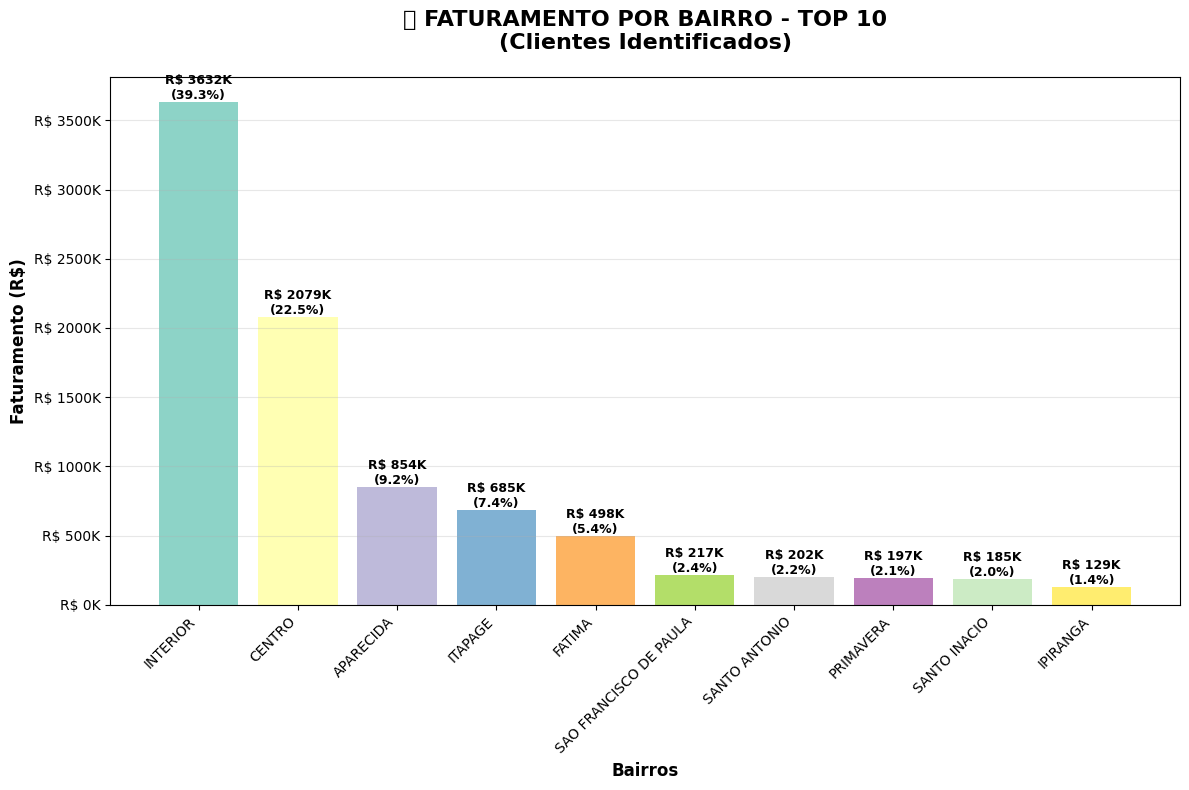

C:\Users\sigmu\AppData\Local\Temp\ipykernel_9836\1932213594.py:96: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sigmu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


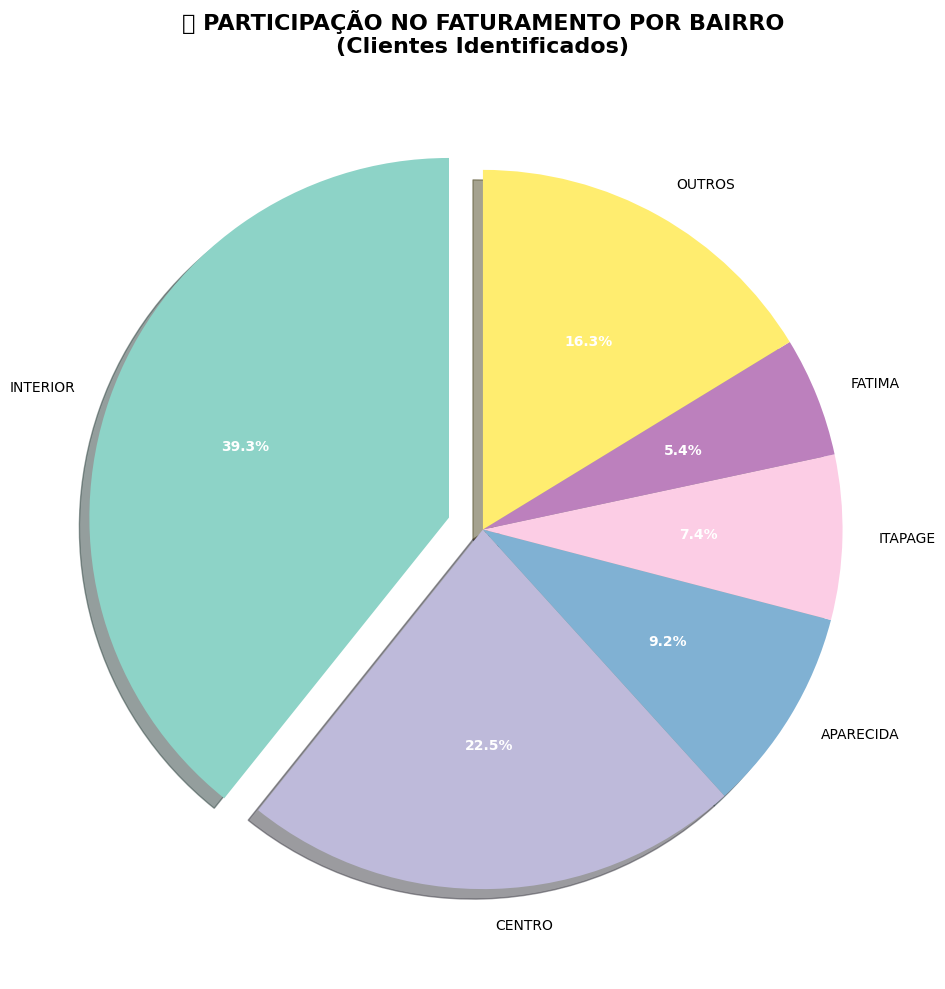

C:\Users\sigmu\AppData\Local\Temp\ipykernel_9836\1932213594.py:134: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sigmu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


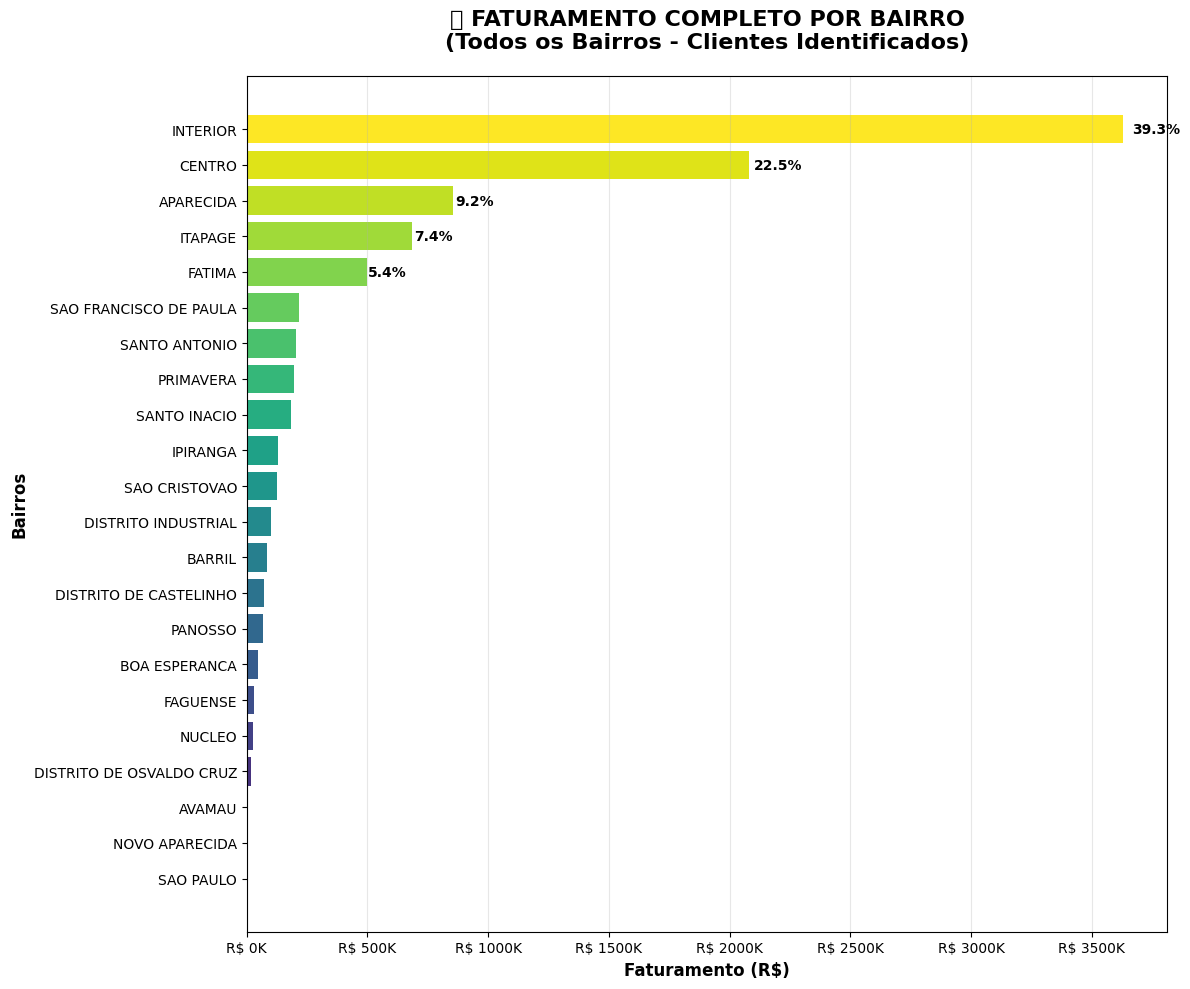

C:\Users\sigmu\AppData\Local\Temp\ipykernel_9836\1932213594.py:177: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sigmu\AppData\Local\Temp\ipykernel_9836\1932213594.py:177: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sigmu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sigmu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


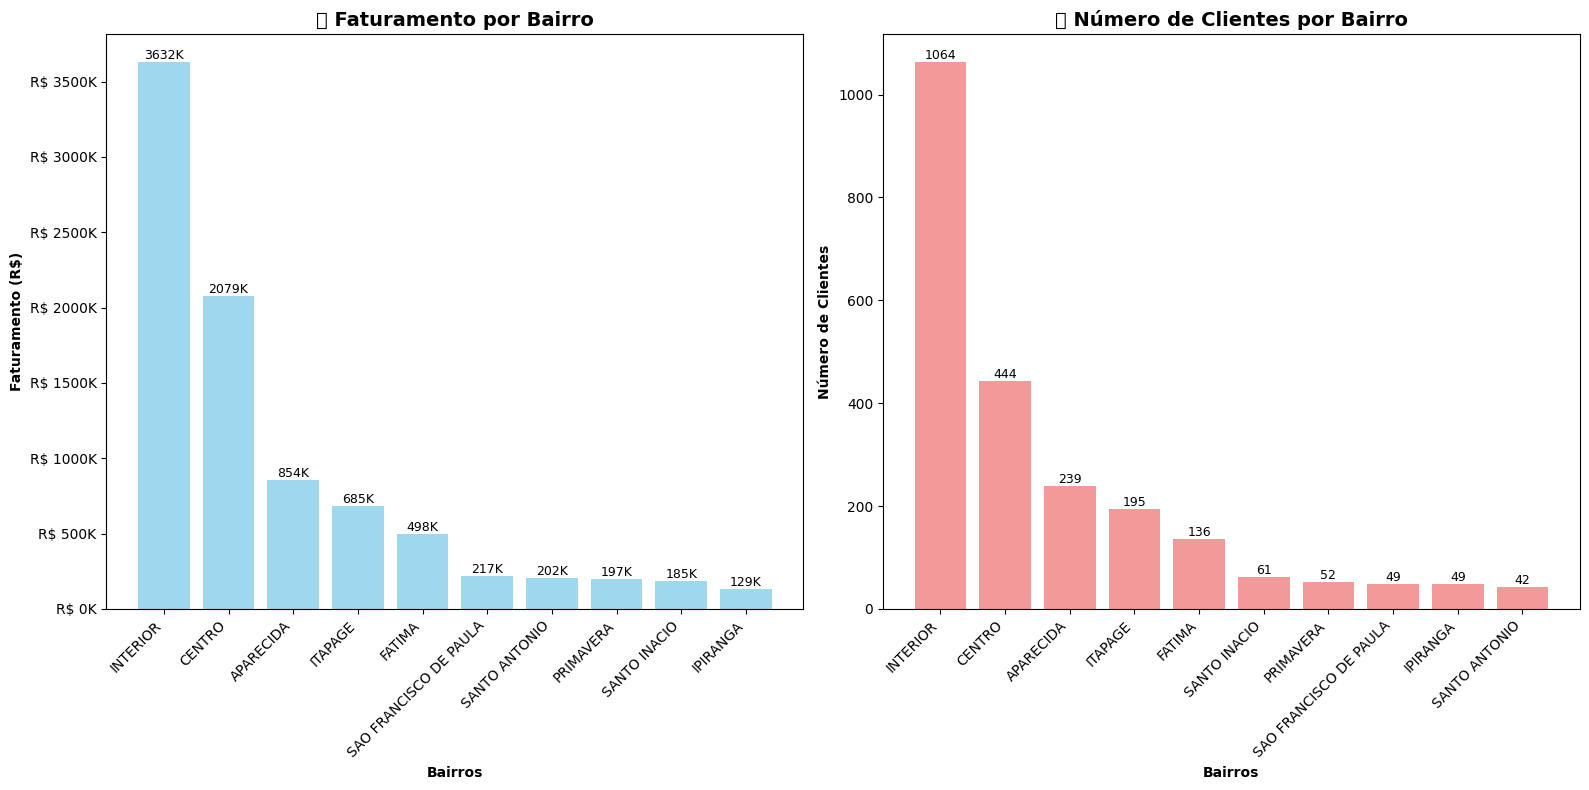


✅ GRÁFICOS CRIADOS COM SUCESSO!
📊 Gráficos gerados:
   1. 📊 Faturamento por Bairro (Top 10) - Barras
   2. 🍕 Participação no Faturamento - Pizza
   3. 📈 Faturamento Completo - Barras Horizontais
   4. 🔄 Comparativo Faturamento vs Clientes

📈 RESUMO DOS DADOS (Clientes Identificados):
   • Total de bairros: 22
   • Faturamento total: R$ 9,251,318.34
   • Total de clientes: 2,520
   • Total de vendas: 76,552
   • Concentração: Top 3 bairros = 71.0% do faturamento


In [30]:
# ========================================================================
# GRÁFICOS: VENDAS POR BAIRRO (CLIENTES IDENTIFICADOS)
# ========================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurando estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

print("📊 CRIANDO GRÁFICOS DE VENDAS POR BAIRRO (SEM CLIENTE 99999)")
print("="*65)

# Dados dos clientes identificados (sem 99999)
df_clientes_identificados_graficos = df_notas[df_notas['Cliente'] != 99999].copy()

# Preparando dados por bairro
vendas_por_bairro_grafico = df_clientes_identificados_graficos.groupby('Bairro').agg({
    'TotalItem': 'sum',           # Faturamento total
    'Controle': 'nunique',        # Número de vendas
    'Cliente': 'nunique'          # Número de clientes únicos
}).sort_values('TotalItem', ascending=False)

# Calculando percentuais
vendas_por_bairro_grafico['Percentual_Faturamento'] = (vendas_por_bairro_grafico['TotalItem'] / vendas_por_bairro_grafico['TotalItem'].sum()) * 100

# ========================================================================
# GRÁFICO 1: FATURAMENTO POR BAIRRO (TOP 10) - GRÁFICO DE BARRAS
# ========================================================================

fig, ax = plt.subplots(figsize=(12, 8))

top_10_bairros = vendas_por_bairro_grafico.head(10)
cores = plt.cm.Set3(np.linspace(0, 1, len(top_10_bairros)))

bars = ax.bar(range(len(top_10_bairros)), top_10_bairros['TotalItem'], color=cores)

# Personalizando o gráfico
ax.set_title('💰 FATURAMENTO POR BAIRRO - TOP 10\n(Clientes Identificados)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Bairros', fontsize=12, fontweight='bold')
ax.set_ylabel('Faturamento (R$)', fontsize=12, fontweight='bold')

# Configurando eixo X
ax.set_xticks(range(len(top_10_bairros)))
ax.set_xticklabels(top_10_bairros.index, rotation=45, ha='right')

# Formatando valores no eixo Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K'))

# Adicionando valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentual = top_10_bairros.iloc[i]['Percentual_Faturamento']
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'R$ {height/1000:.0f}K\n({percentual:.1f}%)',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========================================================================
# GRÁFICO 2: PIZZA DOS TOP 5 + OUTROS - PARTICIPAÇÃO NO FATURAMENTO
# ========================================================================

fig, ax = plt.subplots(figsize=(10, 10))

# Preparando dados para pizza (Top 5 + Outros)
top_5 = vendas_por_bairro_grafico.head(5)
outros_valor = vendas_por_bairro_grafico.iloc[5:]['TotalItem'].sum()
outros_percentual = (outros_valor / vendas_por_bairro_grafico['TotalItem'].sum()) * 100

# Criando listas para o gráfico de pizza
labels = list(top_5.index) + ['OUTROS']
sizes = list(top_5['Percentual_Faturamento']) + [outros_percentual]
colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))

# Destacando o maior bairro
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                  explode=explode, colors=colors, shadow=True,
                                  startangle=90, textprops={'fontsize': 10})

# Personalizando textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('🏘️ PARTICIPAÇÃO NO FATURAMENTO POR BAIRRO\n(Clientes Identificados)', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# ========================================================================
# GRÁFICO 3: GRÁFICO DE BARRAS HORIZONTAIS - TODOS OS BAIRROS
# ========================================================================

fig, ax = plt.subplots(figsize=(12, 10))

# Ordenando por faturamento (do menor para o maior para barras horizontais)
bairros_ordenados = vendas_por_bairro_grafico.sort_values('TotalItem', ascending=True)

# Criando gradient de cores
cores_gradient = plt.cm.viridis(np.linspace(0, 1, len(bairros_ordenados)))

bars = ax.barh(range(len(bairros_ordenados)), bairros_ordenados['TotalItem'], color=cores_gradient)

# Personalizando o gráfico
ax.set_title('📊 FATURAMENTO COMPLETO POR BAIRRO\n(Todos os Bairros - Clientes Identificados)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Faturamento (R$)', fontsize=12, fontweight='bold')
ax.set_ylabel('Bairros', fontsize=12, fontweight='bold')

# Configurando eixo Y
ax.set_yticks(range(len(bairros_ordenados)))
ax.set_yticklabels(bairros_ordenados.index, fontsize=10)

# Formatando valores no eixo X
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K'))

# Adicionando valores nas barras para os top 5
for i, bar in enumerate(bars[-5:], start=len(bars)-5):
    width = bar.get_width()
    percentual = bairros_ordenados.iloc[i]['Percentual_Faturamento']
    ax.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
            f'{percentual:.1f}%', ha='left', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ========================================================================
# GRÁFICO 4: COMPARATIVO: FATURAMENTO vs NÚMERO DE CLIENTES
# ========================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico 1: Faturamento
top_10_faturamento = vendas_por_bairro_grafico.head(10)
bars1 = ax1.bar(range(len(top_10_faturamento)), top_10_faturamento['TotalItem'], 
               color='skyblue', alpha=0.8)

ax1.set_title('💰 Faturamento por Bairro', fontsize=14, fontweight='bold')
ax1.set_xlabel('Bairros', fontweight='bold')
ax1.set_ylabel('Faturamento (R$)', fontweight='bold')
ax1.set_xticks(range(len(top_10_faturamento)))
ax1.set_xticklabels(top_10_faturamento.index, rotation=45, ha='right')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K'))

# Gráfico 2: Número de Clientes
top_10_clientes = vendas_por_bairro_grafico.sort_values('Cliente', ascending=False).head(10)
bars2 = ax2.bar(range(len(top_10_clientes)), top_10_clientes['Cliente'], 
               color='lightcoral', alpha=0.8)

ax2.set_title('👥 Número de Clientes por Bairro', fontsize=14, fontweight='bold')
ax2.set_xlabel('Bairros', fontweight='bold')
ax2.set_ylabel('Número de Clientes', fontweight='bold')
ax2.set_xticks(range(len(top_10_clientes)))
ax2.set_xticklabels(top_10_clientes.index, rotation=45, ha='right')

# Adicionando valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height/1000:.0f}K', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ========================================================================
# RESUMO DOS GRÁFICOS
# ========================================================================

print("\n✅ GRÁFICOS CRIADOS COM SUCESSO!")
print("="*50)
print("📊 Gráficos gerados:")
print("   1. 📊 Faturamento por Bairro (Top 10) - Barras")
print("   2. 🍕 Participação no Faturamento - Pizza")
print("   3. 📈 Faturamento Completo - Barras Horizontais")
print("   4. 🔄 Comparativo Faturamento vs Clientes")

# Dados resumo
total_faturamento = vendas_por_bairro_grafico['TotalItem'].sum()
total_clientes = vendas_por_bairro_grafico['Cliente'].sum()
total_vendas = vendas_por_bairro_grafico['Controle'].sum()

print(f"\n📈 RESUMO DOS DADOS (Clientes Identificados):")
print(f"   • Total de bairros: {len(vendas_por_bairro_grafico)}")
print(f"   • Faturamento total: R$ {total_faturamento:,.2f}")
print(f"   • Total de clientes: {total_clientes:,}")
print(f"   • Total de vendas: {total_vendas:,}")
print(f"   • Concentração: Top 3 bairros = {vendas_por_bairro_grafico.head(3)['Percentual_Faturamento'].sum():.1f}% do faturamento")